In [1]:
import keras
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline


In [2]:
data = pd.read_csv(r"C:\Users\solomon\Downloads\dataset\iris.csv")

In [3]:
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
data.drop("Id",axis=1,inplace=True)

In [5]:
from ydata_profiling import ProfileReport
profile = ProfileReport(data,title = "ProfileReport")

In [6]:
profile.to_notebook_iframe()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [7]:
X = data.drop("Species", axis=1)
y = data["Species"]

In [8]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [9]:
y = encoder.fit_transform(y)
species_mapping = {index: label for index, label in enumerate(encoder.classes_)}
species_mapping

{0: 'Iris-setosa', 1: 'Iris-versicolor', 2: 'Iris-virginica'}

In [10]:
from sklearn.preprocessing import RobustScaler
scale = RobustScaler()

In [11]:
X = scale.fit_transform(X)

In [12]:
X

array([[-0.53846154,  1.        , -0.84285714, -0.73333333],
       [-0.69230769,  0.        , -0.84285714, -0.73333333],
       [-0.84615385,  0.4       , -0.87142857, -0.73333333],
       [-0.92307692,  0.2       , -0.81428571, -0.73333333],
       [-0.61538462,  1.2       , -0.84285714, -0.73333333],
       [-0.30769231,  1.8       , -0.75714286, -0.6       ],
       [-0.92307692,  0.8       , -0.84285714, -0.66666667],
       [-0.61538462,  0.8       , -0.81428571, -0.73333333],
       [-1.07692308, -0.2       , -0.84285714, -0.73333333],
       [-0.69230769,  0.2       , -0.81428571, -0.8       ],
       [-0.30769231,  1.4       , -0.81428571, -0.73333333],
       [-0.76923077,  0.8       , -0.78571429, -0.73333333],
       [-0.76923077,  0.        , -0.84285714, -0.8       ],
       [-1.15384615,  0.        , -0.92857143, -0.8       ],
       [ 0.        ,  2.        , -0.9       , -0.73333333],
       [-0.07692308,  2.8       , -0.81428571, -0.6       ],
       [-0.30769231,  1.

In [13]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=40)

In [14]:
import keras
from keras import layers

In [15]:
inputs = keras.Input(shape=(4,))
x = layers.Dense(32, activation="relu",name="Dense1")(inputs)
x = layers.Dense(32, activation="relu", name="Dense2")(x)
outputs = layers.Dense(10,activation="softmax",name="prediction")(x)

model = keras.Model(inputs = inputs, outputs = outputs)

In [16]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 4)]               0         
                                                                 
 Dense1 (Dense)              (None, 32)                160       
                                                                 
 Dense2 (Dense)              (None, 32)                1056      
                                                                 
 prediction (Dense)          (None, 10)                330       
                                                                 
Total params: 1546 (6.04 KB)
Trainable params: 1546 (6.04 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [17]:
keras.utils.plot_model(model)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


In [18]:
model.compile(
    optimizer=keras.optimizers.RMSprop(),  # Optimizer
    # Loss function to minimize
    loss=keras.losses.SparseCategoricalCrossentropy(),
    # List of metrics to monitor
    metrics=[keras.metrics.SparseCategoricalAccuracy()],
)

In [25]:
model.summary()
keras.utils.plot_model(model)

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 4)]               0         
                                                                 
 Dense1 (Dense)              (None, 32)                160       
                                                                 
 Dense2 (Dense)              (None, 32)                1056      
                                                                 
 prediction (Dense)          (None, 10)                330       
                                                                 
Total params: 1546 (6.04 KB)
Trainable params: 1546 (6.04 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


In [20]:
epoch = 200

In [21]:
history = model.fit(X_train,y_train,validation_split=0.2, batch_size= 32,epochs=epoch)

Epoch 1/200
3/3 [==============================] - 2s 211ms/step - loss: 2.3782 - sparse_categorical_accuracy: 0.0000e+00 - val_loss: 2.2901 - val_sparse_categorical_accuracy: 0.0000e+00
Epoch 2/200
3/3 [==============================] - 0s 26ms/step - loss: 2.2980 - sparse_categorical_accuracy: 0.0787 - val_loss: 2.2311 - val_sparse_categorical_accuracy: 0.2174
Epoch 3/200
3/3 [==============================] - 0s 23ms/step - loss: 2.2391 - sparse_categorical_accuracy: 0.3146 - val_loss: 2.1793 - val_sparse_categorical_accuracy: 0.5652
Epoch 4/200
3/3 [==============================] - 0s 26ms/step - loss: 2.1861 - sparse_categorical_accuracy: 0.5169 - val_loss: 2.1313 - val_sparse_categorical_accuracy: 0.6957
Epoch 5/200
3/3 [==============================] - 0s 23ms/step - loss: 2.1363 - sparse_categorical_accuracy: 0.6067 - val_loss: 2.0846 - val_sparse_categorical_accuracy: 0.7826
Epoch 6/200
3/3 [==============================] - 0s 26ms/step - loss: 2.0868 - sparse_categorical_a

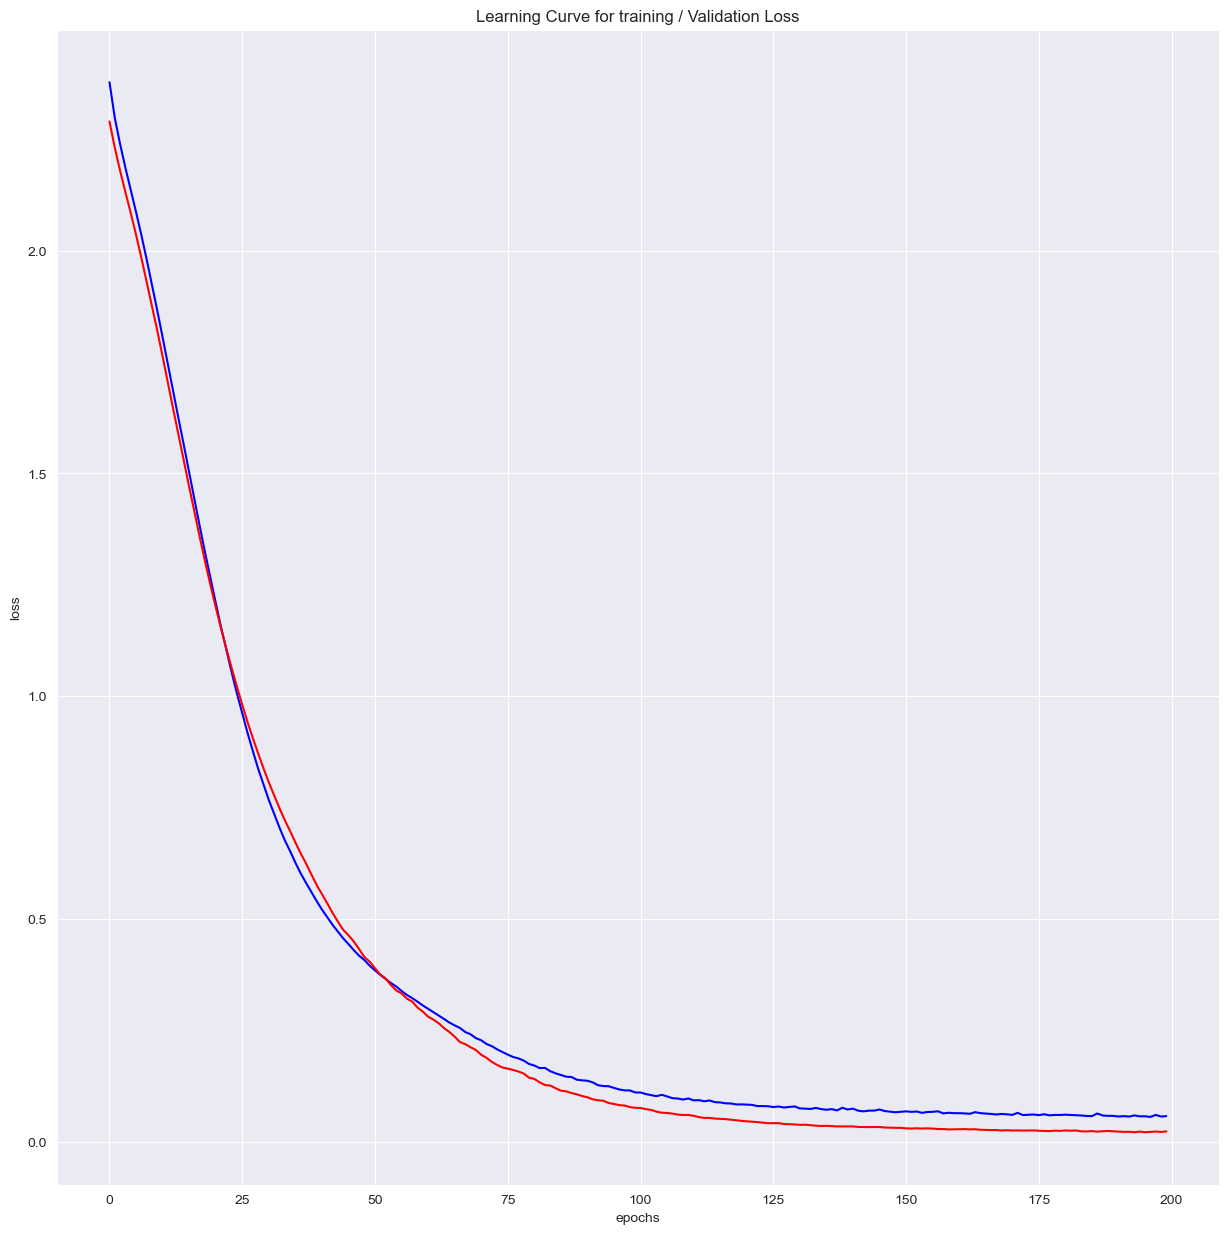

In [22]:
plt.figure(figsize=(15,15))
plt.plot(range(epoch), history.history["loss"],color = "blue")
plt.plot(range(epoch), history.history["val_loss"],color = "red")
plt.title("Learning Curve for training / Validation Loss")
plt.xlabel("epochs")
plt.ylabel("loss")
plt.show()

In [23]:
model.evaluate(X_test,y_test)

2/2 [==============================] - 0s 8ms/step - loss: 0.0165 - sparse_categorical_accuracy: 1.0000


[0.016479384154081345, 1.0]